In [ ]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.neigrs import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
traindata = pd.read_csv('/content/drive/MyDrive/UNSW_NB15_training-set.csv')
testdata = pd.read_csv('/content/drive/MyDrive/UNSW_NB15_testing-set.csv')

In [ ]:
df = pd.concat([traindata, testdata],axis=0)

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/UNSW_NB15.csv')

In [ ]:
df.shape

(257673, 45)

In [ ]:
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [ ]:
df.replace(['-', ' '], np.nan, inplace=True)

In [ ]:
df.isnull().sum()

id                        0
dur                       0
proto                     0
service              141321
state                     0
spkts                     0
dpkts                     0
sbytes                    0
dbytes                    0
rate                      0
sttl                      0
dttl                      0
sload                     0
dload                     0
sloss                     0
dloss                     0
sinpkt                    0
dinpkt                    0
sjit                      0
djit                      0
swin                      0
stcpb                     0
dtcpb                     0
dwin                      0
tcprtt                    0
synack                    0
ackdat                    0
smean                     0
dmean                     0
trans_depth               0
response_body_len         0
ct_srv_src                0
ct_state_ttl              0
ct_dst_ltm                0
ct_src_dport_ltm          0
ct_dst_sport_ltm    

In [ ]:
df = df.fillna('others')

In [ ]:
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [ ]:
df = df.drop('id',axis=1)

In [ ]:
# see if binary columns are really binary
for col in 'is_sm_ips_ports', 'is_ftp_login':
    print(df[col].value_counts())
    print()



0    253995
1      3678
Name: is_sm_ips_ports, dtype: int64

0    254428
1      3219
4        16
2        10
Name: is_ftp_login, dtype: int64



In [ ]:
df['is_ftp_login'] = np.where(df['is_ftp_login']>1, 1, df['is_ftp_login'])


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(162745, 44)

In [ ]:
#features = pd.read_csv('/content/drive/MyDrive/IoT_ML_Dataset/UNSW/UNSW_NB15_features.csv')
features = pd.read_csv('/content/drive/MyDrive/UNSW_NB15_features.csv')

In [ ]:
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [ ]:
features['Type '] = features['Type '].str.lower()

In [ ]:
features['Type '].head()

0    nominal
1    integer
2    nominal
3    integer
4    nominal
Name: Type , dtype: object

In [ ]:
# selecting column names of all data types
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [ ]:

# selecting common column names from dataset and feature dataset
cols = df.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [ ]:
# Converting integer columns to numeric
for c in integer_names:
  pd.to_numeric(df[c])

# Converting binary columns to numeric
for c in binary_names:
  pd.to_numeric(df[c])

# Converting float columns to numeric
for c in float_names:
  pd.to_numeric(df[c])

In [ ]:
df_ = df[['proto','state','service']]

In [ ]:
df = df.drop(['proto','state','service'],axis=1)

In [ ]:
#encoding the string types using labelencoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df_ = df_.apply(LabelEncoder().fit_transform)


In [ ]:
#one_hot_df = pd.get_dummies(df, columns=['proto', 'state', 'service'])

In [ ]:
one_hot_df = pd.concat([df, df_],axis=1)

In [ ]:

one_hot_df.shape

(162745, 44)

In [ ]:
X = one_hot_df.drop(['attack_cat'],axis=1)
y = one_hot_df['attack_cat']

In [ ]:

y.value_counts()

Normal            85722
Exploits          27434
Fuzzers           20960
Reconnaissance     9991
Generic            7599
DoS                5500
Analysis           2032
Backdoor           1880
Shellcode          1456
Worms               171
Name: attack_cat, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE for minority classes
smote = SMOTE(sampling_strategy="not majority")
X_balanced, y_balanced = smote.fit_resample(X, y)

In [ ]:
df_ = pd.concat([X_balanced, y_balanced], axis=1)

In [ ]:

# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features=correlation(df_,0.9)
print(len(set(corr_features)))
print(corr_features)

<ipython-input-34-e765a043238a>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


10
{'ct_srv_dst', 'dwin', 'dloss', 'sloss', 'dbytes', 'ct_ftp_cmd', 'sbytes', 'synack', 'is_sm_ips_ports', 'ackdat'}


In [ ]:
df_ = df_.drop(['dbytes', 'dwin', 'sloss', 'dloss', 'sbytes', 'is_sm_ips_ports', 'ackdat', 'ct_srv_dst', 'ct_ftp_cmd', 'synack'],axis=1)

In [ ]:
X_balanced = df_.drop(['attack_cat'],axis=1)
y_balanced = df_['attack_cat']

In [ ]:
from sklearn.preprocessing import LabelEncoder as le

y_balanced= le().fit_transform(y_balanced)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_balanced,y_balanced,test_size=0.3, random_state=50)

In [ ]:
X_train.shape, y_train.shape

((600054, 33), (600054,))

In [ ]:
X_test.shape, y_test.shape

((257166, 33), (257166,))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
# reshape input to be [samples, time steps, features]
X_train_re = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test_re = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
X_train_re_re = np.reshape(np.array(X_train), (X_train.shape[0],1, X_train.shape[1]))
X_test_re_re = np.reshape(np.array(X_test), (X_test.shape[0],1, X_test.shape[1]))

In [ ]:
X_train_re.shape, X_train_re_re.shape

((600054, 33, 1), (600054, 1, 33))

In [ ]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

In [ ]:
from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [ ]:
model = Sequential()
model.add(LSTM(256,input_dim=33, return_sequences=True, activation = 'relu'))
model.add(Dropout(0.1))
model.add(LSTM(200, return_sequences=True, activation = 'relu'))
model.add(Dropout(0.1))
model.add(LSTM(128, return_sequences=True, activation = 'relu'))
model.add(Dropout(0.1))
model.add(LSTM(64, return_sequences=False, activation = 'relu'))
model.add(Dropout(0.1))
#model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))




In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)
history = model.fit(X_train_re_re, y_train, validation_split=0.3, epochs = 50, batch_size = 100, verbose=2)

Epoch 1/50
4201/4201 - 177s - loss: 0.9339 - accuracy: 0.6462 - val_loss: 0.7124 - val_accuracy: 0.7244 - 177s/epoch - 42ms/step
Epoch 2/50
4201/4201 - 162s - loss: 0.7136 - accuracy: 0.7236 - val_loss: 0.6575 - val_accuracy: 0.7440 - 162s/epoch - 39ms/step
Epoch 3/50
4201/4201 - 163s - loss: 0.6731 - accuracy: 0.7376 - val_loss: 0.6364 - val_accuracy: 0.7517 - 163s/epoch - 39ms/step
Epoch 4/50
4201/4201 - 165s - loss: 0.6503 - accuracy: 0.7447 - val_loss: 0.6184 - val_accuracy: 0.7569 - 165s/epoch - 39ms/step
Epoch 5/50
4201/4201 - 161s - loss: 0.6365 - accuracy: 0.7500 - val_loss: 0.6271 - val_accuracy: 0.7513 - 161s/epoch - 38ms/step
Epoch 6/50
4201/4201 - 166s - loss: 0.6243 - accuracy: 0.7532 - val_loss: 0.5982 - val_accuracy: 0.7612 - 166s/epoch - 40ms/step
Epoch 7/50
4201/4201 - 166s - loss: 0.6157 - accuracy: 0.7568 - val_loss: 0.5917 - val_accuracy: 0.7664 - 166s/epoch - 39ms/step
Epoch 8/50
4201/4201 - 167s - loss: 0.6068 - accuracy: 0.7607 - val_loss: 0.5829 - val_accuracy: 

In [ ]:
loss, accuracy = model.evaluate(X_test_re_re, y_test)

8037/8037 [==============================] - 59s 7ms/step - loss: 0.5090 - accuracy: 0.7975


In [ ]:
y_pred = model.predict(X_test_re_re)

8037/8037 [==============================] - 57s 7ms/step


In [ ]:
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

Accuracy:  0.797492670104135
Precision: 0.8181
Recall: 0.7974
F1 Score: 0.8016


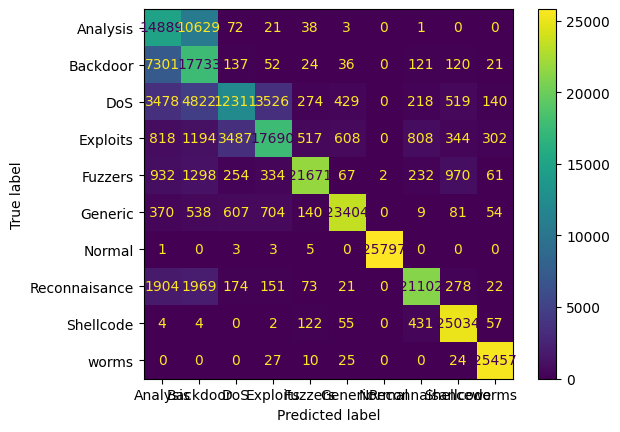

In [ ]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test_labels,y_pred_labels)
print("Accuracy: ", metrics.accuracy_score(y_test_labels,y_pred_labels))
print('Precision: %.4f' % precision_score(y_test_labels, y_pred_labels, average='macro'))
print('Recall: %.4f' % recall_score(y_test_labels, y_pred_labels,average = 'macro'))
print('F1 Score: %.4f' % f1_score(y_test_labels, y_pred_labels, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Normal','Reconnaisance','Shellcode','worms'])
cm_display.plot()
plt.show()


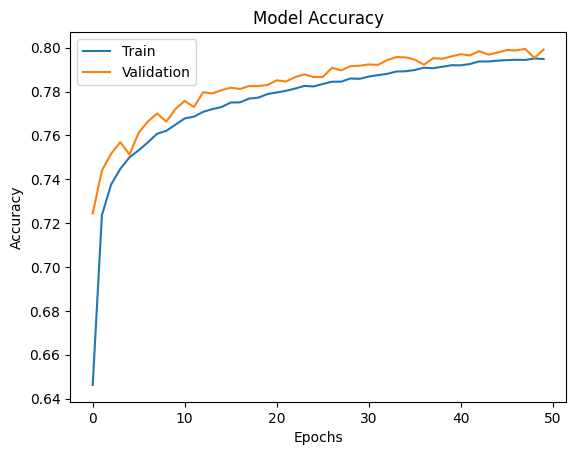

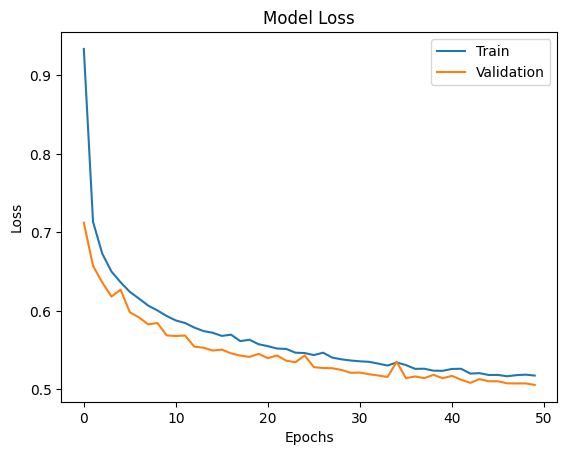

In [ ]:
# Plotting the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
cnn = Sequential()
cnn.add(Convolution1D(256, 3,activation="relu",input_shape=(33, 1)))
cnn.add(MaxPooling1D(2))
cnn.add(Convolution1D(128,3, activation="relu"))
cnn.add(MaxPooling1D(2))
cnn.add(Convolution1D(64, 3, activation="relu"))
cnn.add(MaxPooling1D(2))
cnn.add(Flatten())
cnn.add(Dense(128, activation="relu"))
cnn.add(Dropout(0.1))
cnn.add(Dense(10, activation="softmax"))

In [ ]:
cnn.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)
history = cnn.fit(X_train_re, y_train, validation_split=0.3, epochs = 50, batch_size = 100, verbose=2)

Epoch 1/50
4201/4201 - 191s - loss: 0.8665 - accuracy: 0.6702 - val_loss: 0.7293 - val_accuracy: 0.7157 - 191s/epoch - 45ms/step
Epoch 2/50
4201/4201 - 189s - loss: 0.7267 - accuracy: 0.7170 - val_loss: 0.6897 - val_accuracy: 0.7271 - 189s/epoch - 45ms/step
Epoch 3/50
4201/4201 - 185s - loss: 0.6929 - accuracy: 0.7283 - val_loss: 0.6719 - val_accuracy: 0.7359 - 185s/epoch - 44ms/step
Epoch 4/50
4201/4201 - 185s - loss: 0.6716 - accuracy: 0.7355 - val_loss: 0.6507 - val_accuracy: 0.7444 - 185s/epoch - 44ms/step
Epoch 5/50
4201/4201 - 184s - loss: 0.6571 - accuracy: 0.7409 - val_loss: 0.6480 - val_accuracy: 0.7411 - 184s/epoch - 44ms/step
Epoch 6/50
4201/4201 - 183s - loss: 0.6444 - accuracy: 0.7442 - val_loss: 0.6332 - val_accuracy: 0.7477 - 183s/epoch - 44ms/step
Epoch 7/50
4201/4201 - 177s - loss: 0.6371 - accuracy: 0.7468 - val_loss: 0.6282 - val_accuracy: 0.7515 - 177s/epoch - 42ms/step
Epoch 8/50
4201/4201 - 180s - loss: 0.6287 - accuracy: 0.7505 - val_loss: 0.6212 - val_accuracy: 

In [ ]:
loss, accuracy = cnn.evaluate(X_test_re, y_test)
y_pred = cnn.predict(X_test_re)

8037/8037 [==============================] - 46s 6ms/step


In [ ]:
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

Accuracy:  0.7350505121205758
Precision: 0.7557
Recall: 0.7348
F1 Score: 0.7367


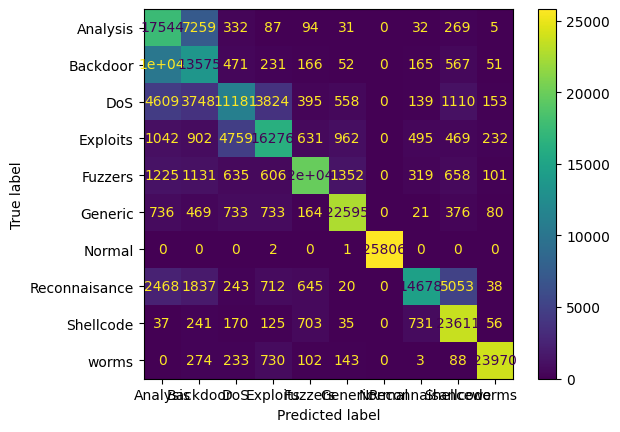

In [ ]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test_labels,y_pred_labels)
print("Accuracy: ", metrics.accuracy_score(y_test_labels,y_pred_labels))
print('Precision: %.4f' % precision_score(y_test_labels, y_pred_labels, average='macro'))
print('Recall: %.4f' % recall_score(y_test_labels, y_pred_labels,average = 'macro'))
print('F1 Score: %.4f' % f1_score(y_test_labels, y_pred_labels, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Normal','Reconnaisance','Shellcode','worms'])
cm_display.plot()
plt.show()


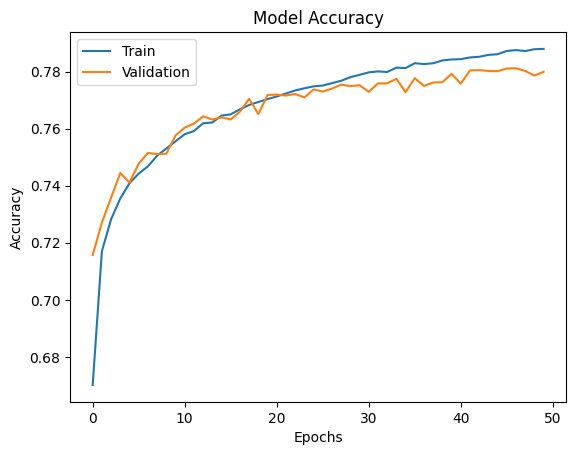

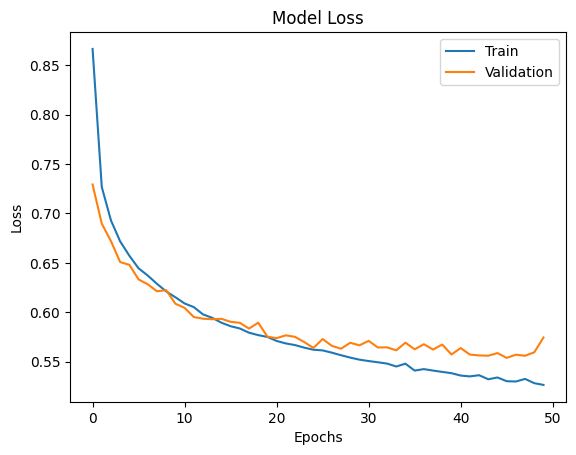

In [ ]:
# Plotting the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plotting the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
lstm_output_size = 100

cnnlstm = Sequential()
cnnlstm.add(Convolution1D(256, 3,activation="relu",input_shape=(33, 1)))
#cnnlstm.add(MaxPooling1D(2))
cnnlstm.add(Convolution1D(256, 3,activation="relu"))
cnnlstm.add(MaxPooling1D(2))
cnnlstm.add(Dropout(0.4))
cnnlstm.add(Convolution1D(256, 3,activation="relu"))
cnnlstm.add(MaxPooling1D(2))
cnnlstm.add(LSTM(lstm_output_size))
cnnlstm.add(Dropout(0.4))
cnnlstm.add(Dense(10, activation="softmax"))

In [ ]:
cnnlstm.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])
history = cnnlstm.fit(X_train_re, y_train, validation_split=0.3 , epochs = 25, batch_size = 200, verbose=2)

Epoch 1/25
2101/2101 - 1008s - loss: 0.8580 - accuracy: 0.6737 - val_loss: 0.7180 - val_accuracy: 0.7208 - 1008s/epoch - 480ms/step
Epoch 2/25
2101/2101 - 981s - loss: 0.7270 - accuracy: 0.7175 - val_loss: 0.6632 - val_accuracy: 0.7361 - 981s/epoch - 467ms/step
Epoch 3/25
2101/2101 - 980s - loss: 0.6922 - accuracy: 0.7299 - val_loss: 0.6432 - val_accuracy: 0.7431 - 980s/epoch - 467ms/step
Epoch 4/25
2101/2101 - 980s - loss: 0.6701 - accuracy: 0.7374 - val_loss: 0.6284 - val_accuracy: 0.7481 - 980s/epoch - 466ms/step
Epoch 5/25
2101/2101 - 970s - loss: 0.6522 - accuracy: 0.7434 - val_loss: 0.6138 - val_accuracy: 0.7567 - 970s/epoch - 462ms/step
Epoch 6/25
2101/2101 - 981s - loss: 0.6395 - accuracy: 0.7477 - val_loss: 0.6067 - val_accuracy: 0.7569 - 981s/epoch - 467ms/step
Epoch 7/25
2101/2101 - 980s - loss: 0.6286 - accuracy: 0.7518 - val_loss: 0.5981 - val_accuracy: 0.7617 - 980s/epoch - 466ms/step
Epoch 8/25
2101/2101 - 985s - loss: 0.6189 - accuracy: 0.7552 - val_loss: 0.5861 - val_a

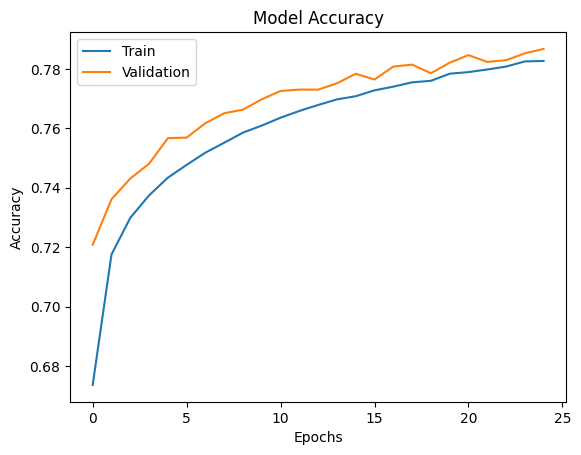

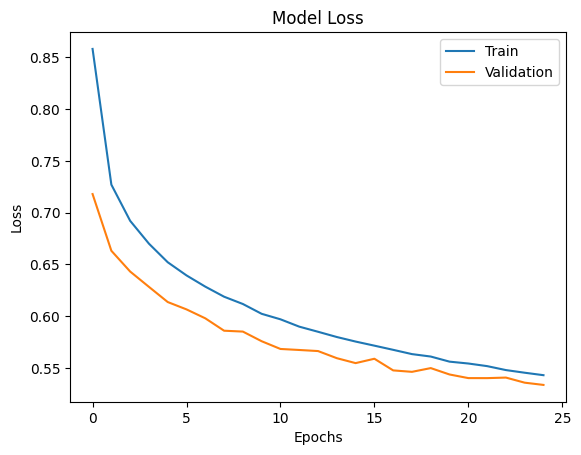

In [ ]:
# Plotting the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plotting the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
loss, accuracy = cnnlstm.evaluate(X_test_re, y_test)
y_pred = cnnlstm.predict(X_test_re)
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

8037/8037 [==============================] - 143s 18ms/step


Accuracy:  0.7729715436721806
Precision: 0.7994
Recall: 0.7729
F1 Score: 0.7763


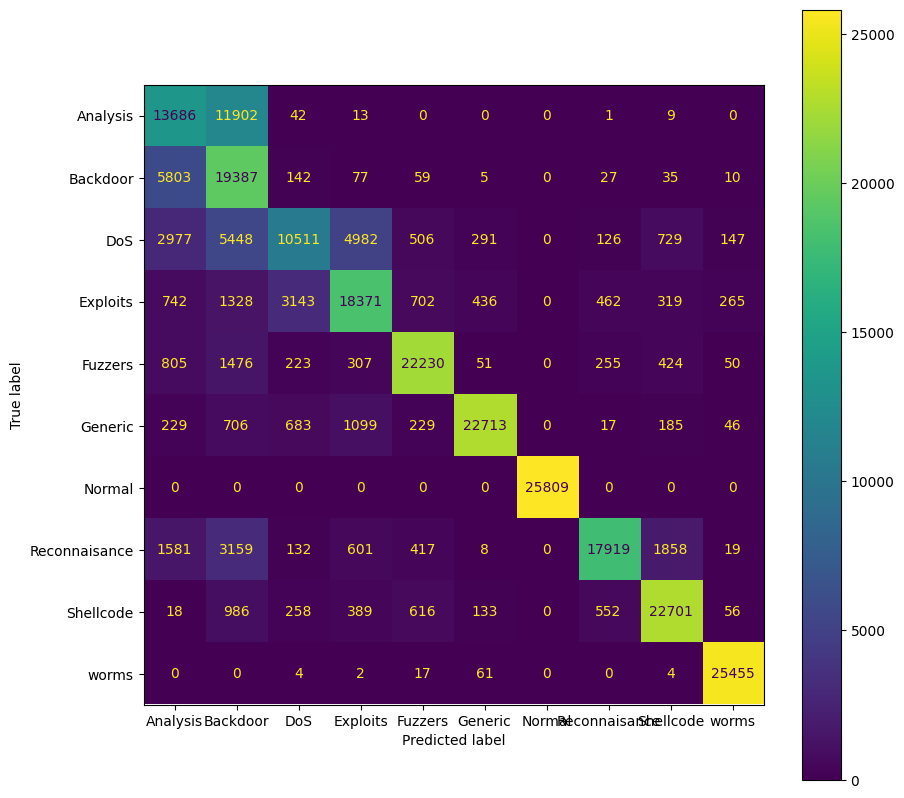

In [ ]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test_labels,y_pred_labels)
print("Accuracy: ", metrics.accuracy_score(y_test_labels,y_pred_labels))
print('Precision: %.4f' % precision_score(y_test_labels, y_pred_labels, average='macro'))
print('Recall: %.4f' % recall_score(y_test_labels, y_pred_labels,average = 'macro'))
print('F1 Score: %.4f' % f1_score(y_test_labels, y_pred_labels, average ='macro'))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Normal','Reconnaisance','Shellcode','worms'])
plt.figure(figsize=(10, 10))
plt.gca().set_aspect('equal')
cm_display.plot(ax=plt.gca())

plt.show()


Accuracy:  0.7729715436721806
Precision: 0.7994
Recall: 0.7729
F1 Score: 0.7763


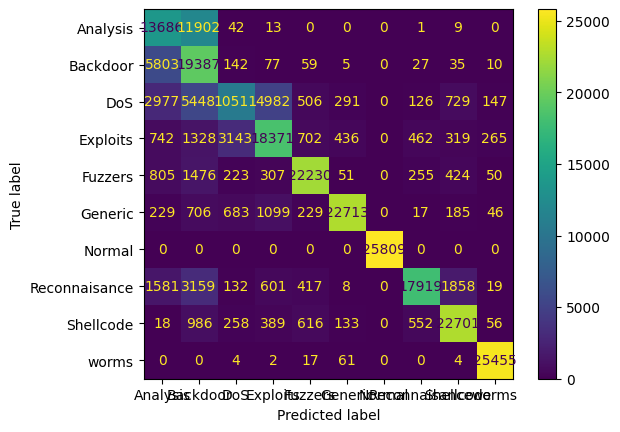

In [ ]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test_labels,y_pred_labels)
print("Accuracy: ", metrics.accuracy_score(y_test_labels,y_pred_labels))
print('Precision: %.4f' % precision_score(y_test_labels, y_pred_labels, average='macro'))
print('Recall: %.4f' % recall_score(y_test_labels, y_pred_labels,average = 'macro'))
print('F1 Score: %.4f' % f1_score(y_test_labels, y_pred_labels, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Normal','Reconnaisance','Shellcode','worms'])
cm_display.plot()
plt.show()


In [ ]:
gru = Sequential()
gru.add(GRU(256,input_dim=33, return_sequences=True))
gru.add(Dropout(0.1))
gru.add(GRU(200, return_sequences=True))
gru.add(Dropout(0.1))
gru.add(GRU(128, return_sequences=True))
gru.add(Dropout(0.1))
gru.add(GRU(128, return_sequences=False))
gru.add(Dropout(0.1))
gru.add(Dense(200, activation='relu'))
gru.add(Dense(200, activation='relu'))
gru.add(Dense(10, activation='softmax'))

In [ ]:
gru.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = gru.fit(X_train_re_re, y_train, validation_split=0.15, epochs = 50, batch_size = 256, verbose=2)

Epoch 1/50
1993/1993 - 98s - loss: 0.4943 - accuracy: 0.8012 - val_loss: 0.4867 - val_accuracy: 0.8048 - 98s/epoch - 49ms/step
Epoch 2/50
1993/1993 - 90s - loss: 0.4938 - accuracy: 0.8012 - val_loss: 0.4882 - val_accuracy: 0.8050 - 90s/epoch - 45ms/step
Epoch 3/50
1993/1993 - 90s - loss: 0.4915 - accuracy: 0.8017 - val_loss: 0.4862 - val_accuracy: 0.8057 - 90s/epoch - 45ms/step
Epoch 4/50
1993/1993 - 90s - loss: 0.4916 - accuracy: 0.8017 - val_loss: 0.4871 - val_accuracy: 0.8058 - 90s/epoch - 45ms/step
Epoch 5/50
1993/1993 - 91s - loss: 0.4907 - accuracy: 0.8032 - val_loss: 0.4851 - val_accuracy: 0.8074 - 91s/epoch - 46ms/step
Epoch 6/50
1993/1993 - 93s - loss: 0.4891 - accuracy: 0.8030 - val_loss: 0.4863 - val_accuracy: 0.8071 - 93s/epoch - 46ms/step
Epoch 7/50
1993/1993 - 98s - loss: 0.4883 - accuracy: 0.8033 - val_loss: 0.4832 - val_accuracy: 0.8083 - 98s/epoch - 49ms/step
Epoch 8/50
1993/1993 - 103s - loss: 0.4886 - accuracy: 0.8038 - val_loss: 0.4860 - val_accuracy: 0.8085 - 103s/

In [ ]:
loss, accuracy = gru.evaluate(X_test_re_re, y_test)
y_pred = gru.predict(X_test_re_re)
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

8037/8037 [==============================] - 48s 6ms/step


Accuracy:  0.8018711649284898
Precision: 0.8243
Recall: 0.8017
F1 Score: 0.8073


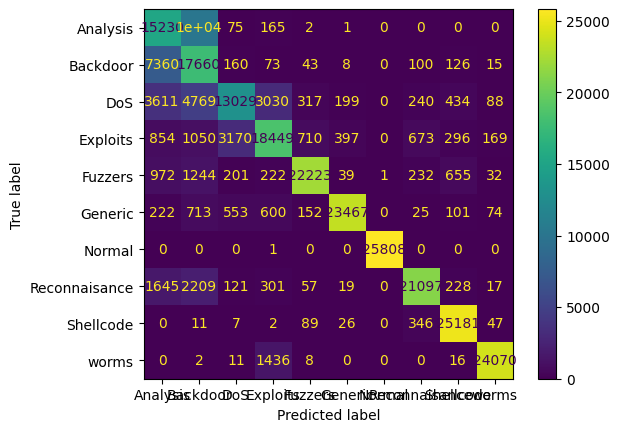

In [ ]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test_labels,y_pred_labels)
print("Accuracy: ", metrics.accuracy_score(y_test_labels,y_pred_labels))
print('Precision: %.4f' % precision_score(y_test_labels, y_pred_labels, average='macro'))
print('Recall: %.4f' % recall_score(y_test_labels, y_pred_labels,average = 'macro'))
print('F1 Score: %.4f' % f1_score(y_test_labels, y_pred_labels, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Normal','Reconnaisance','Shellcode','worms'])
cm_display.plot()
plt.show()


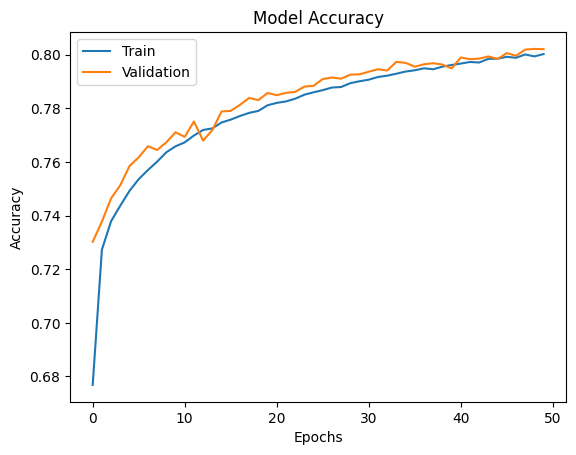

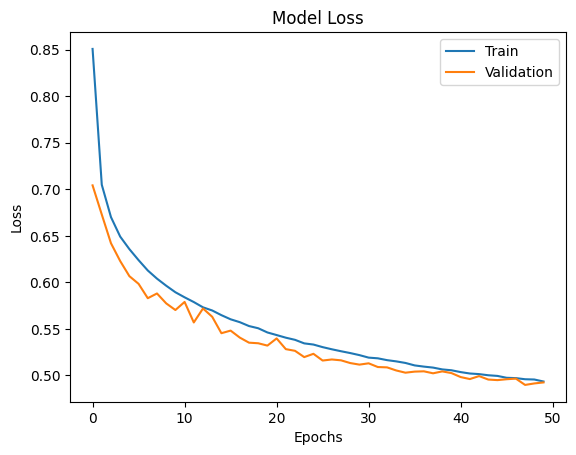

In [ ]:
# Plotting the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plotting the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()